In [5]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.utils import load_h5_dict
from dm21cm.interpolators import interp1d

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file("../plotting/matplotlibrc")

In [6]:
from analysis.limits import get_limits

In [8]:
get_limits(np.array([1, 100, 10000]), 'pbh-acc-PRc23-test')

array([1.42922021e+01, 1.25822058e-02, 1.69149550e-05])

In [2]:
# d0 = load_h5_dict('/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/data/hmf/hmf.h5')
d0 = load_h5_dict('../../data/production/pwave_hmf_summed_rate.h5')

d0.keys()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../../data/production/pwave_hmf_summed_rate.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
np.any(np.isnan(d0['ps_cond'])), np.any(np.isnan(d0['ps'])), np.any(np.isnan(d0['st']))

(False, False, False)

In [12]:
d0['units']

'cell_size: [cfMpc]. r_fixed: [cfMpc]. z: [1]. d: [1]. m: [Msun]. All tables: [1 / cMpc^3 Msun].'

In [3]:
i_d_s = []
for d in [-0.5, 0, 0.5]:
    i_d_s.append(np.argmin(np.abs(d0['d']-d)))
print(i_d_s)

NameError: name 'd0' is not defined

NameError: name 'd0' is not defined

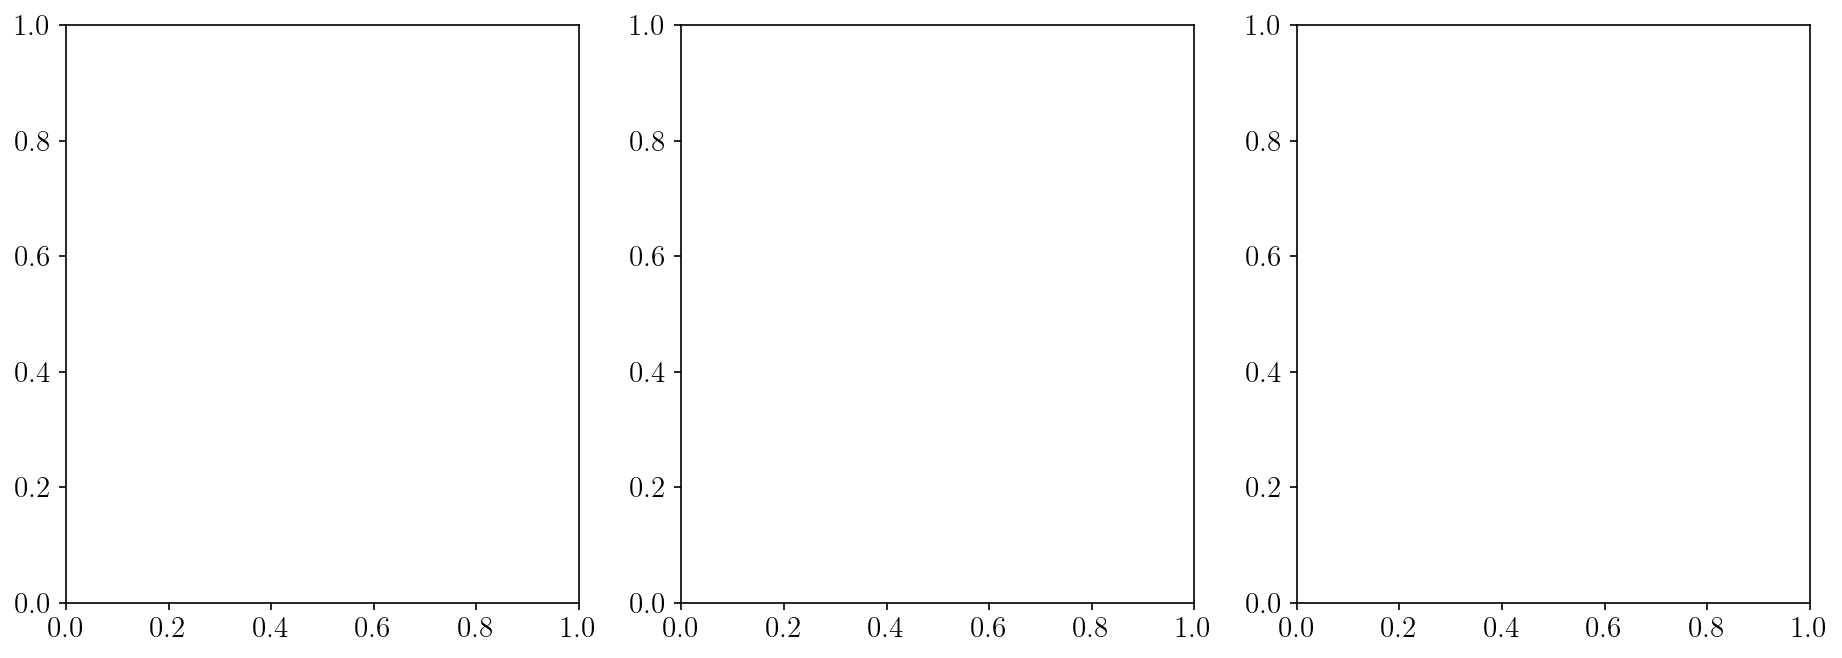

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

extent = np.log10(np.array([d0['m'][0], d0['m'][-1], d0['z'][0], d0['z'][-1]]))

for i_ax, i_d in enumerate(i_d_s):
    ax = axs[i_ax]
    ax.imshow(np.log10(d0['ps_cond'][:, i_d, :]) * d0['m'][None, None, :], origin='lower', extent=extent, vmin=-30, vmax=5, aspect='auto')
    ax.set(xlabel='log10(halo mass/Msun)', ylabel='log10(z)', title=f'd={d0["d"][i_d]:.3f}')

# Compare

In [18]:
d0 = load_h5_dict('../../data/pwave/archive/ann_rates_zm.h5')
d1 = load_h5_dict('../../data/pwave/pwave_partial_ann_rate_zm.h5')

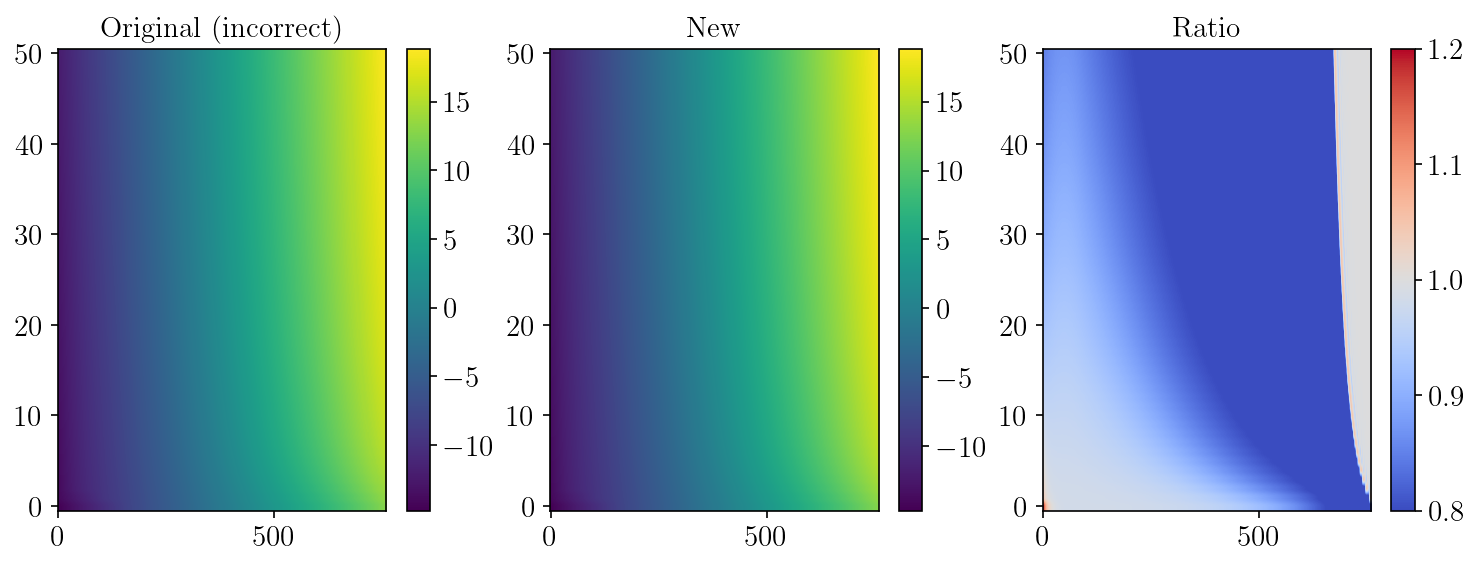

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

ax = axs[0]
im = ax.imshow(np.log10(d0['ann_rates']), origin='lower', aspect='auto')
ax.set_title('Original (incorrect)')
fig.colorbar(im, ax=ax)

ax = axs[1]
im = ax.imshow(np.log10(d1['ann_rate']), origin='lower', aspect='auto')
ax.set_title('New')
fig.colorbar(im, ax=ax)

ax = axs[2]
im = ax.imshow(d1['ann_rate'] / d0['ann_rates'], origin='lower', aspect='auto', cmap='coolwarm', vmin=0.8, vmax=1.2)
ax.set_title('Ratio')
fig.colorbar(im, ax=ax)

In [19]:
d0 = load_h5_dict('../../data/pwave/archive/pwave_ann_rate_sphere.h5')
d1 = load_h5_dict('/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/data/zf002/data/pwave_sum_rate.h5')
d2 = load_h5_dict('../../data/production/pwave_hmf_summed_rate.h5')

In [21]:
d1['ps_cond_ann_rate'].shape

(128, 51, 128)

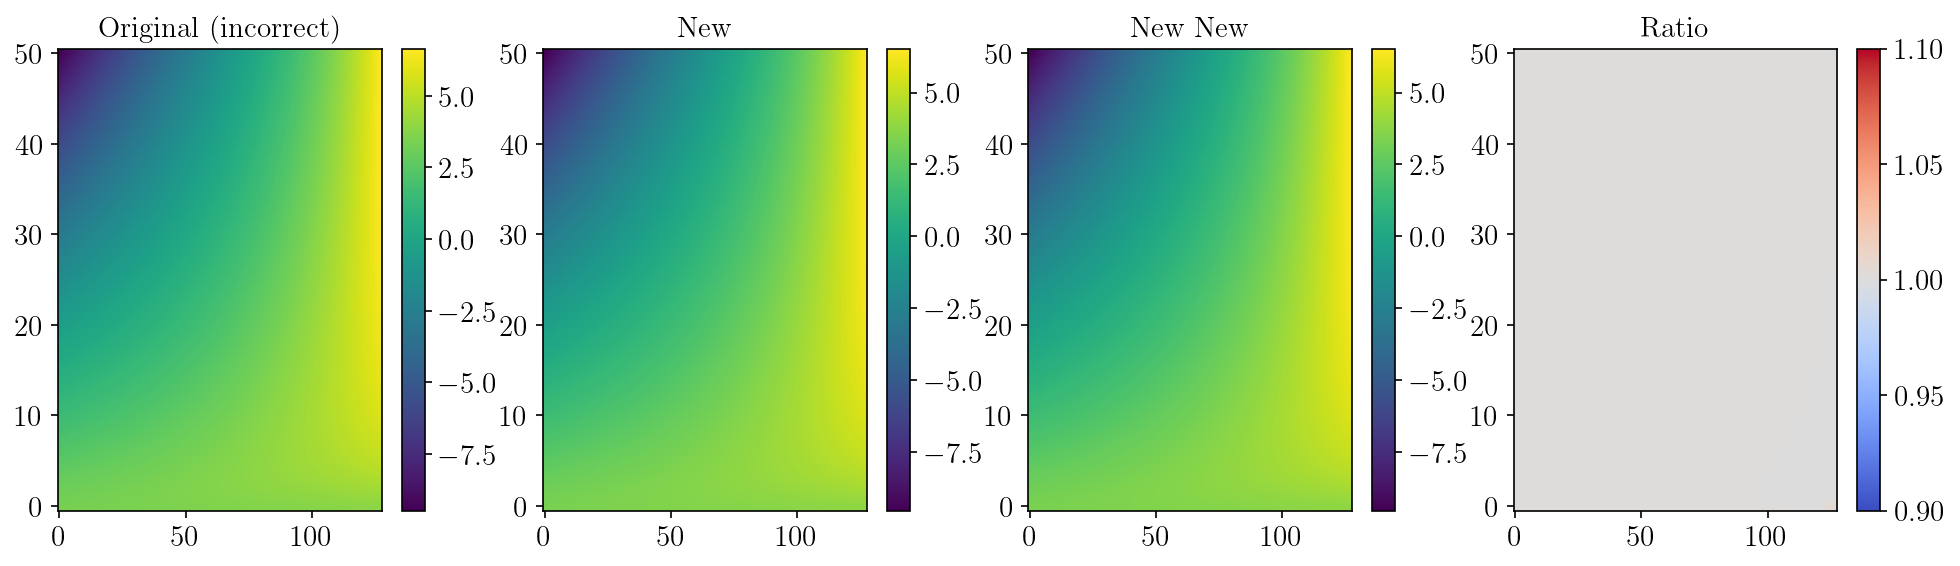

In [25]:
cell_size = 2 # [cMpc] | comoving box size
r_fixed = cell_size / np.cbrt(4*np.pi/3)
z0 = np.einsum('zdr->rzd', d0['ps_cond_ann_rate_table'])
z0 = interp1d(z0, d0['r_range'], r_fixed)

cell_size = 2 # [cMpc] | comoving box size
r_fixed = cell_size / np.cbrt(4*np.pi/3)
z1 = d1['ps_cond_ann_rate']
z1 = interp1d(z1, d1['r'], r_fixed)

z2 = d2['ps_cond']

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

ax = axs[0]
im = ax.imshow(np.log10(z0), origin='lower', aspect='auto')
ax.set_title('Original (incorrect)')
fig.colorbar(im, ax=ax)

ax = axs[1]
im = ax.imshow(np.log10(z1), origin='lower', aspect='auto')
ax.set_title('New')
fig.colorbar(im, ax=ax)

ax = axs[2]
im = ax.imshow(np.log10(z2), origin='lower', aspect='auto')
ax.set_title('New New')
fig.colorbar(im, ax=ax)

ax = axs[3]
im = ax.imshow(z2 / z1, origin='lower', aspect='auto', cmap='coolwarm', vmin=0.9, vmax=1.1)
ax.set_title('Ratio')
fig.colorbar(im, ax=ax)

In [26]:
np.max(z2 / z1), np.min(z2 / z1)

(Array(1.0057362, dtype=float32), Array(0.9994292, dtype=float32))

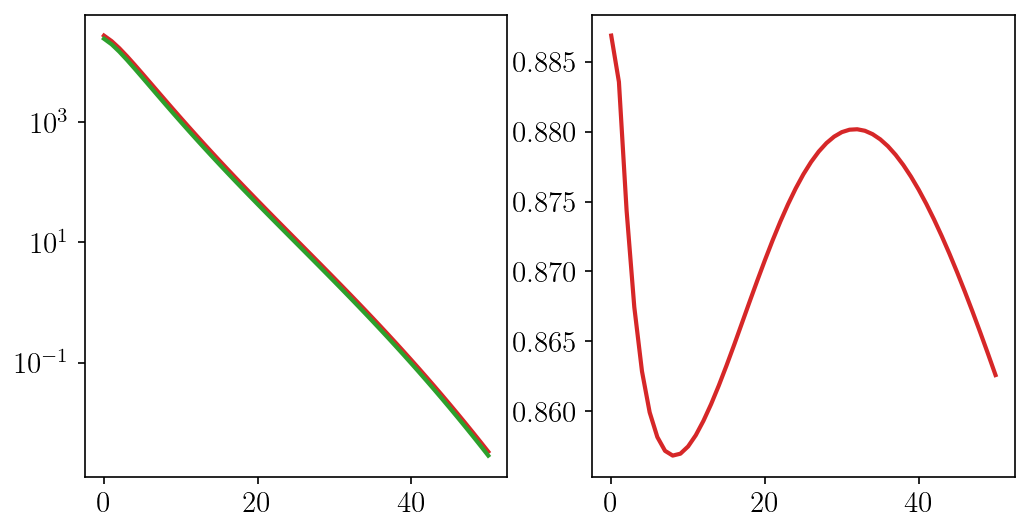

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

ax = axs[0]
ax.plot(d0['ps_ann_rate_table'])
ax.plot(d1['ps_ann_rate'])
ax.set(yscale='log')

ax = axs[1]
ax.plot(d1['ps_ann_rate'] / d0['ps_ann_rate_table'])

# TMP

In [13]:
sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.injections.dm import DMPWaveAnnihilationInjection
import jax.numpy as jnp
from dm21cm.interpolators import interp2d, interp2d_vmap

In [15]:
inj = DMPWaveAnnihilationInjection(primary='elec_delta', m_DM=1e6, c_sigma=1, cell_size=2)